# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
x= df.temperature

***1. Is the distribution of body temperatures normal?***

Scipy provides a way to test for that using the stats.normaltest(). This function test whether a sample differs from a normal distribution. This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [4]:
stats.normaltest(x)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Since p-value is greater than the significant value of 0.05, we fail to reject the null hypothesis concluding that the sample x is normal

In [5]:
#we can doublecheck by plotting this.
sns.distplot(df['temperature'], fit=stats.norm)

**2.A -  Is the sample size large?**

In [6]:
#sample size (n)
sample_size = len(x)
print(sample_size)

130


Sample size n of 130 is more than 30. A sample size of 30 is recommended for most statistical analysis involving the central limit theorem (CLT) because it is known to have enough power to provide good results for cases where normal distribution or bell shaped curve is required.

**2.B - Are the observations independent?**

There are two ways to consider independence of observations:

- observations between groups should be independent

- observations within each group must be independent

The first basically means the groups are made up of different people. You don’t want one person appearing twice in two different groups as it could skew your results. This can also happen when you have a condition affecting different groups at the same time. The second means if two or more data points in one group are connected in some way, this could also skew your data. All these are done to try to reduce bias and ensure generalization of findings from sample to population.  

It should be noted that each variable or measure should not be taken in isolation because we are considering independence of each observational units. Observational units are the rows, and the variables or measures are the columns. There is a possiblility that a factor like **temperature** could have some dependencies on **sex** or **heart beat.** So, it is best to look at the groupings of associated measures or variables for each observational units. Another point of note is that independence are usually expressed in terms of residuals or errors and not on outcome variables, and such should not have any pattern on a residual plot or should be a random blob for same.

Expressing the relationship of the variables as shown below with the multi-linear equation

**Heart_beat = α + (β1*temperature) + (β2*gender) + ε**

**ε** is the residual. Since we have no control over the data generation process and **ε** is unknown, we can estimate it with error **e** as shown below:

**e = observed value - predicted value**

The residual plot is now a plot of the e vs the predicted value for Heart_beat.
http://www.statisticshowto.com/assumption-of-independence/

In [7]:
import statsmodels.formula.api as sm

In [15]:
results = sm.ols(formula='heart_rate ~ temperature + gender', data=df).fit()
Y_pred = results.predict(df.loc[:,['temperature', 'gender']])
residual = df["heart_rate"].values-Y_pred


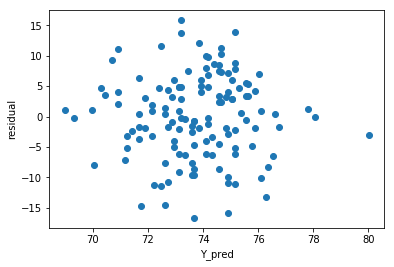

In [16]:
plt.scatter(Y_pred,residual)
plt.xlabel("Y_pred")
plt.ylabel("residual")
plt.show()

Looking at the above, we see we have no specific pattern, which means observational units are somewhat independent. This works because each data point represent the heart_rate for each individual, which is a function of temperature and gender. And, that accounts for the whole observational unit.

In [17]:
##sum(residual)

### 3. - Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  t  or  z  statistic?
- Now try using the other test. How is the result be different? Why?

### Answers
- We are using a one-sample test because we are comparing a sample mean with the known population mean or a constant value
- A z statistic should work, because we have a sample size that is large enough (n > 30) to provide results that will satisfy normality using the CLT

***Hypothesis test***
- Null Hypothesis: Population Mean = 98.6 degrees 

- Alternate Hypothesis: Population Mean != 98.6 degrees

In [11]:
#calculating statistics
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
population_mean = 98.6

In [12]:
#calculate Z value
Z = ((sample_mean - population_mean) / (sample_std / np.sqrt(sample_size)))
print(Z)

-5.47592520208


In [18]:
#comparing the manual calculation with statsmodels ztest functions calculation
from statsmodels.stats.weightstats import CompareMeans, ttest_ind, ztest, zconfint
#from statsmodels.stats import weightstats as stests
z_statistic, pvalue=ztest(x,value=population_mean)
print('z_statistic: ', z_statistic)
print('pvalue: ', pvalue)

z_statistic:  -5.45482329236
pvalue:  4.9021570141e-08


Which is about the same thing. Since the p-value of 4.9021570141e-08 is less than the significant level α = 0.05, we reject the null hypothesis Ho, reporting that the population mean of the tempearture is different from 98.6 degrees

Now, trying the two-sample test:

In [19]:
x1 = df[df['gender'] == 'F']['temperature']
x2 = df[df['gender'] == 'M']['temperature']

In [20]:
x1_mean = x1.mean() #you can also use np.mean(x1)
x2_mean = x2.mean() #np.mean(x2) works too
mean_diff = x1_mean - x2_mean

In [21]:
x1_std_sq = (x1.std())**2
x2_std_sq = (x2.std())**2

In [22]:
x1_n = len(x1)
x2_n = len(x2)

In [23]:
import math
Z = ((x1_mean - x2_mean) / math.sqrt((x1_std_sq/x1_n) + (x2_std_sq/x2_n)))
print(Z)

2.285434538165274


In [24]:
z_statistic, pvalue=ztest(x1, x2, value=mean_diff, alternative='two-sided')
print('z_statistic: ', z_statistic)
print('pvalue: ', pvalue)

z_statistic:  3.36872646047e-13
pvalue:  1.0


In [38]:
#Cross-check with scipy
z_statistic, pvalue = stats.ttest_1samp(df.temperature, population_mean)
print('z_statistic: ', z_statistic)
print('pvalue: ', pvalue)

z_statistic:  -5.45482329236
pvalue:  2.41063204156e-07


Which is about the same thing. Since the p-value of 2.41063204156e-07 is less than the significant level α = 0.05, we reject the null hypothesis Ho, reporting that there population mean of the tempearture is different from 98.6 degrees

Now, trying the two-sample test:

In [26]:
df_female = df[df['gender'] == 'F']
df_male = df[df['gender'] == 'M']

In [27]:
z_statistic, pvalue= stats.ttest_ind(df_female['temperature'],df_male['temperature'])
print('z_statistic: ', z_statistic)
print('pvalue: ', pvalue)

z_statistic:  2.28543453817
pvalue:  0.0239318831224


The p-value of 0.0239318831224 is less than the significant level α = 0.05, we reject the null hypothesis Ho, reporting that the population mean of the tempearture is different from 98.6 degrees

Comparing the p-value of the one-sample and two-sample test above, we see that one sample test is stronger with a lesser chance that our findings happened by chance or random effect. This actually proves the one-sample test is actually better in showing the statistical significant in this case.

**4 - Draw a small sample of size 10 from the data and repeat both tests.**
- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

***Answers***
- We are using a one-sample t-test
- A one-sample test because because we are comparing a sample mean with the known population mean or a constant value
- A t-test because the population standard deviation is unknown or not given and the sample size n is less than 30

***Hypothesis test for one-sample t-test for n=10***
- Null Hypothesis: Population Mean = 98.6 degrees 

- Alternate Hypothesis: Population Mean != 98.6 degrees

In [55]:
df2 = df[40:50]
df3 = df2.reset_index().drop('index', axis=1)
df3

,temperature,gender,heart_rate
0,98.4,F,79.0
1,98.4,M,82.0
2,96.9,M,74.0
3,97.2,M,64.0
4,99.0,F,79.0
5,97.9,F,69.0
6,97.4,M,72.0
7,97.4,M,68.0
8,97.9,M,76.0
9,97.1,M,82.0


In [56]:
#for the one-sample t-test
z_statistic, pvalue = stats.ttest_1samp(df3.temperature, population_mean)
print('z_statistic: ', z_statistic)
print('pvalue: ', pvalue)

z_statistic:  -3.91462952581
pvalue:  0.00353974694118


The p-value of 0.00353974694118 is less than the significant level α = 0.05, so we reject the null hypothesis Ho, reporting that there population mean temperatures for both sexes are different from 98.6 degress.

***Hypothesis test for two-sample t-test for n=10***
- Null Hypothesis: Population mean of males temperature = Population mean of females temperature 

- Alternate Hypothesis: Population mean of males temperature != Population mean of females temperature

In [62]:
#for the two-sample t-test
df3_female = df3[df3['gender'] == 'F']
df3_male = df3[df3['gender'] == 'M']

In [66]:
z_statistic, pvalue= stats.ttest_ind(df_female['temperature'],df_male['temperature'])
print('t_statistic: ', z_statistic)
print('pvalue: ', pvalue)

t_statistic:  2.28543453817
pvalue:  0.0239318831224


The p-value of 0.0239318831224 is less than the significant level α = 0.05, so we reject the null hypothesis Ho, reporting that there population mean temperatures for both sexes are different from 98.6 degress.

***5 - At what temperature should we consider someone's temperature to be "abnormal"?***
- Start by computing the margin of error and confidence interval.

Since we don't know the standard deviation of the population, we have to use that of the given sample as a stand in when creating the confidience intervals. Since the sample standard deviation may not match the population parameter the interval will have more error when you don't know the population standard deviation. To account for this error, we use what's known as a t-critical value instead of the z-critical value. The t-critical value is drawn from what's known as a t-distribution--a distribution that closely resembles the normal distribution but that gets wider and wider as the sample size falls. The t-distribution is available in scipy.stats with the nickname "t" so we can get t-critical values with stats.t.ppf()

In [39]:
sample = df.temperature
#sample_size = len(x)
#sample_mean = np.mean(df.temperature)
# critical value at 95% CI with a degree of freedom df of (sample size - 1)
t_critical = stats.t.ppf(q = 0.975, df = 129) 
t_critical

1.9785244914586051

In [40]:

sample_stdev = sample.std()
sample_stdev

0.7331831580389454

In [42]:
sigma = sample_stdev/math.sqrt(sample_size-1)  # Standard deviation estimate

In [43]:
margin_of_error = t_critical * sigma

In [44]:
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error) 

In [45]:
print("Confidence interval: ", confidence_interval)
#print(confidence_interval)

Confidence interval:  (98.121510726348077, 98.376950812113478)


Any temperature that falls outside the two values of the confidence interval should be seen as abnormal, i.e., anything above 98.38 and below 98.12 is abnormal

***6 - Is there a significant difference between males and females in normal temperature?***
- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

***Answers***
- We are using a two-sample t-test 
- A two-sample test because we are trying to investigate whether the means of two independent data samples differ from one another
- A t-test because the population standard deviation is unknown or not given

Null Hypothesis: Population mean of males temperature = Population mean of females temperature

Alternate Hypothesis: Population mean of males temperature != Population mean of females temperature

In [47]:
# Assume samples have equal variance
t_statistic, pvalue= stats.ttest_ind(df_female['temperature'],df_male['temperature'], equal_var=False)
print('z_statistic: ', z_statistic)
print('pvalue: ', pvalue)   

z_statistic:  -5.45482329236
pvalue:  0.0239382641829


The p-value of 0.0239318831224 is less than the significant level α = 0.05, we reject the null hypothesis Ho, reporting that there population mean temperatures between the males and females are different. 

#important links

https://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-23-point.html

https://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html

https://hamelg.blogspot.com/?view=classic
